In [1]:
import xarray as xr 


ds = xr.open_dataset('/scratch/users/robcking/gwd_u_era5_2010_2020.zarr',chunks={})
ds = ds.isel(level=slice(None,None,-1))

FileNotFoundError: Unable to find group: file:///scratch/users/robcking/gwd_u_era5_2010_2020.zarr

In [5]:
import dask.array as da
from scipy.integrate import cumulative_trapezoid


uw = da.apply_along_axis(cumulative_trapezoid,-1,ds.gwd.data/9.81,x=100*ds.level.data,initial=0,dtype=ds.gwd.data.dtype,shape=ds.level.shape)
gwd_ptv = da.where(ds.gwd.data > 0, ds.gwd.data, 0)
gwd_ntv = da.where(ds.gwd.data < 0, ds.gwd.data, 0)
uw_ptv = da.apply_along_axis(cumulative_trapezoid,-1,gwd_ptv/9.81,x=100*ds.level.data,initial=0,dtype=ds.gwd.data.dtype,shape=ds.level.shape)
uw_ntv = da.apply_along_axis(cumulative_trapezoid,-1,gwd_ntv/9.81,x=100*ds.level.data,initial=0,dtype=ds.gwd.data.dtype,shape=ds.level.shape)


In [6]:
da_uw = xr.DataArray(uw,coords=ds.coords,dims=ds.dims)
da_uw = da_uw.isel(level=slice(None,None,-1))

da_uw_ptv = xr.DataArray(uw_ptv,coords=ds.coords,dims=ds.dims)
da_uw_ptv = da_uw_ptv.isel(level=slice(None,None,-1))

da_uw_ntv = xr.DataArray(uw_ntv,coords=ds.coords,dims=ds.dims)
da_uw_ntv = da_uw_ntv.isel(level=slice(None,None,-1))

In [7]:
ds_uw = xr.Dataset({'uw':da_uw,'uw_ptv':da_uw_ptv,'uw_ntv':da_uw_ntv})

In [10]:
ds_uw.to_zarr('/scratch/users/robcking/uw_era5_2010_2020.zarr',zarr_format=2)

/home/groups/aditis2/robcking/condaenvs/ad99py/lib/python3.12/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 56.08 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


2025-03-28 18:15:15,259 - bokeh.server.protocol_handler - ERROR - error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'ModelChanged', 'model': {'id': 'p1230'}, 'attr': 'start', 'new': -1.2050000000000018}, {'kind': 'ModelChanged', 'model': {'id': 'p1230'}, 'attr': 'end', 'new': 25.305000000000003}]} 
 error: AssertionError()
Traceback (most recent call last):
  File "/home/groups/aditis2/robcking/condaenvs/ad99py/lib/python3.12/site-packages/bokeh/server/protocol_handler.py", line 94, in handle
    work = await handler(message, connection)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/groups/aditis2/robcking/condaenvs/ad99py/lib/python3.12/site-packages/bokeh/server/session.py", line 295, in patch
    return connection.session._handle_patch(message, connection)
           ^^^^^^^^^^^^^^^^^^
  File "/home/groups/aditis2/robcking/condaenvs/ad99py/lib/python3.12/site-packages/bokeh/server/connection.py", line 65, in session
    assert self._ses

KeyboardInterrupt: 

In [14]:
import numpy as np 
from scipy.integrate import cumulative_trapezoid


uw = cumulative_trapezoid(gwd_2010_10hpa_first/9.81,x=100*gwd_2010_10hpa.level,axis=-1,initial=0,)
uw_abs_10hpa = np.abs(uw[...,-1])


NameError: name 'gwd_2010_10hpa_first' is not defined

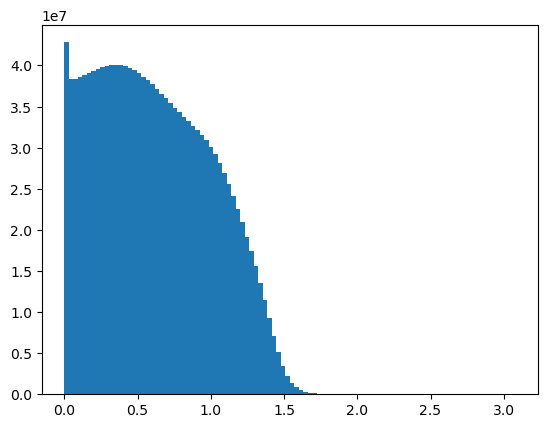

In [19]:
import matplotlib.pyplot as plt
plt.hist(uw_10hpa[uw_10hpa>0].ravel()*1000,bins=100)
print()

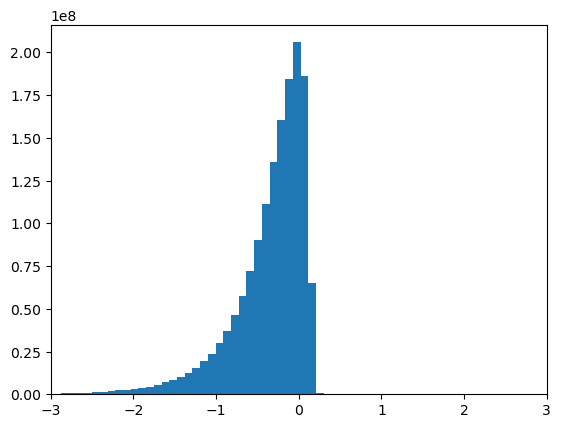

In [20]:
import numpy as np 
plt.hist(np.log10(uw_10hpa[uw_10hpa>0].ravel()*1000),bins=100)
plt.xlim(-3,3)
print()